# Task 1: Importing Libraries

In [4]:
import os
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

# Task 2: Load the Dataset

In [5]:
img_dims=64

def load_data(directory, _shear_range=0, _zoom_range=0, _horizontal_flip=False):
    train_datagen=ImageDataGenerator(
        rescale=1./255,
        shear_range=_shear_range,
        zoom_range=_zoom_range,
        horizontal_flip=_horizontal_flip
    )
    data=train_datagen.flow_from_directory(
        directory,
        target_size=(img_dims,img_dims),
        batch_size=8,
        class_mode='binary',
        color_mode="grayscale"
    )
    return data

training_set = load_data("/usercode/dataset/training_set",0.2,0.2,True)
validate_set = load_data("/usercode/dataset/validation_set")

Found 1000 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


# Task 3: Visualize the Dataset

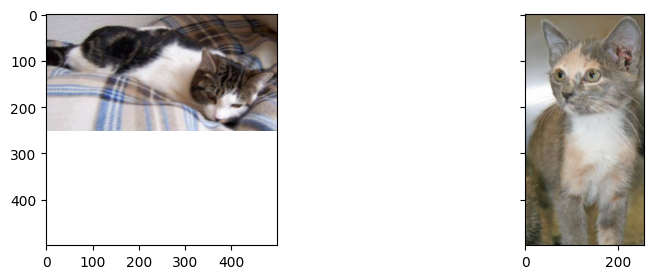

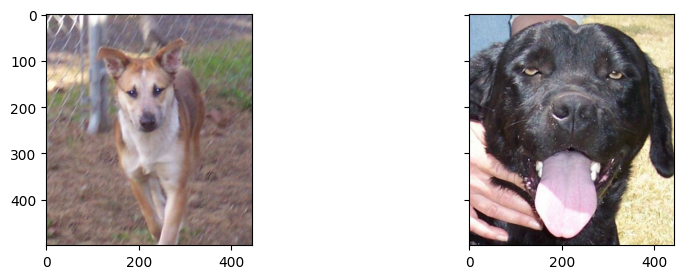

In [6]:
def display_images(path,directory_list):
   fig,ax=plt.subplots(1,2,figsize=(10,3),sharex='col',sharey='row')
   indx=0
   for image_name in directory_list:
       input_path = os.path.join(path, image_name)
       img=plt.imread(input_path)
       ax[indx].imshow(img)
       indx+=1

cat_directory = "/usercode/dataset/training_set/cat"
dog_directory = "/usercode/dataset/training_set/dog"

display_images(cat_directory,os.listdir(cat_directory)[0:2])
display_images(dog_directory,os.listdir(dog_directory)[0:2])

# Task 4: Create an Instance of the Neural Network

In [7]:
model=tf.keras.models.Sequential()

# Task 5: Adding the Layers to the CNN

In [8]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(img_dims,img_dims,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 128)               1968256   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,968,545
Trainable params: 1,968,545
Non-trainable params: 0
______________________________________________

# Task 6: Compile the Model


In [9]:
optmz = Adam(learning_rate=0.0001)
model.compile(optimizer=optmz,loss='binary_crossentropy',metrics=['accuracy'])

# Task 7: Train the CNN

In [10]:
history=model.fit(x=training_set,validation_data=validate_set,epochs=30)

Epoch 1/30
125/125 [==============================] - 12s 85ms/step - loss: 0.7004 - accuracy: 0.5160 - val_loss: 0.6858 - val_accuracy: 0.5160
Epoch 2/30
125/125 [==============================] - 12s 99ms/step - loss: 0.6941 - accuracy: 0.5180 - val_loss: 0.6783 - val_accuracy: 0.5920
Epoch 3/30
125/125 [==============================] - 11s 88ms/step - loss: 0.6900 - accuracy: 0.5370 - val_loss: 0.6769 - val_accuracy: 0.5400
Epoch 4/30
125/125 [==============================] - 9s 75ms/step - loss: 0.6751 - accuracy: 0.5740 - val_loss: 0.6579 - val_accuracy: 0.6360
Epoch 5/30
125/125 [==============================] - 10s 78ms/step - loss: 0.6576 - accuracy: 0.6380 - val_loss: 0.6565 - val_accuracy: 0.5760
Epoch 6/30
125/125 [==============================] - 13s 104ms/step - loss: 0.6427 - accuracy: 0.6350 - val_loss: 0.6483 - val_accuracy: 0.6000
Epoch 7/30
125/125 [==============================] - 9s 74ms/step - loss: 0.6262 - accuracy: 0.6410 - val_loss: 0.6115 - val_accuracy: 

# Task 8: Test the CNN

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_itr = test_datagen.flow_from_directory(
   "/usercode/dataset/test_set",
   target_size=(img_dims, img_dims),
   batch_size=1,
   color_mode='grayscale',
   class_mode='binary',
   shuffle=False
)

loss, accuracy = model.evaluate(test_itr)
print("Accuracy: ", accuracy, ", Loss: ", loss)

#model=tf.keras.models.load_model("/usercode/trained-model")

Found 100 images belonging to 2 classes.
100/100 [==============================] - 1s 6ms/step - loss: 0.8421 - accuracy: 0.6200
Accuracy:  0.6200000047683716 , Loss:  0.8420658111572266


# Task 9: Visualize the Metrics

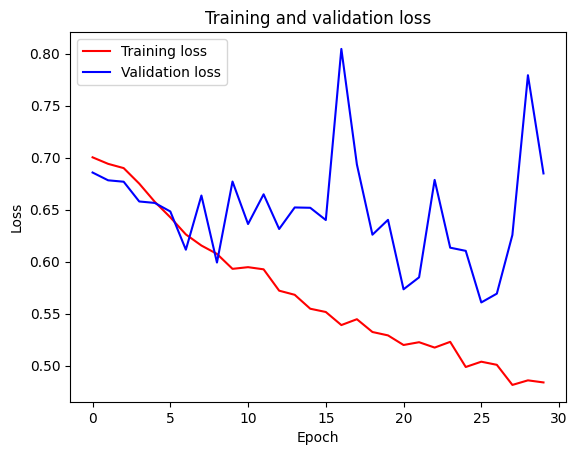

In [12]:
history=history.history
plt.plot(history['loss'], label='Training loss',color='r')
plt.plot(history['val_loss'], label='Validation loss',color='b')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

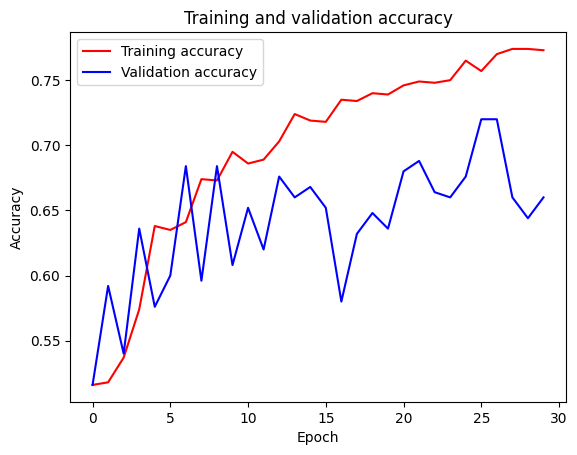

In [13]:
plt.plot(history['accuracy'], label='Training accuracy',color='r')
plt.plot(history['val_accuracy'], label='Validation accuracy',color='b')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import pickle
with open("/usercode/trained-model-history.pickle",'rb') as file: 
    history = pickle.load(file) 

# Task 10: Plot the Confusion Matrix


<Axes: >

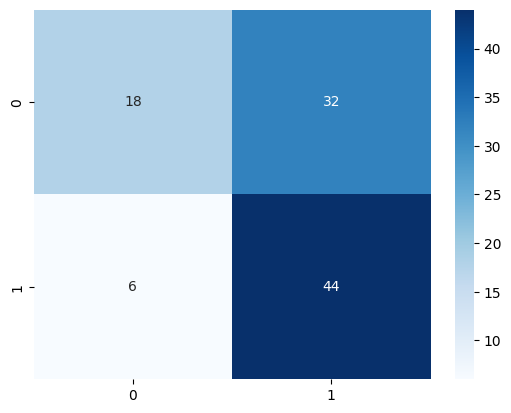

In [18]:
#import jupyter-notebook-renderer
results = model.predict(test_itr, verbose=0)
results = np.round(results)
true_vals = test_itr.classes

confusion_mtx = tf.math.confusion_matrix(true_vals, results)
sns.heatmap(confusion_mtx,cmap=plt.cm.Blues,annot=True)